In [2]:
import numpy as np
import pandas as pd
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.spatial import distance
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Task1 - ROC AUC

In [62]:
def ROC_AUC(y, probabilities):
    shifts = sorted(list(zip(probabilities, y)), reverse=True)
    step_x = 1/np.where(y != 1)[0].shape[0]
    step_y = 1/np.where(y == 1)[0].shape[0]
    points_x = [0]
    points_y = [0]
    last_x = 0
    last_y = 0
    auc = 0
    for prob, sample_y in shifts:
        if sample_y == 1:
            points_x.append(last_x)
            last_y += step_y
            points_y.append(last_y)
        else:
            points_y.append(last_y)
            last_x += step_x
            points_x.append(last_x)
            auc += step_x * last_y
    return auc, points_x, points_y

Spam dataset

In [55]:
spam_df = pd.read_csv('../data/spam.csv')
X = spam_df[spam_df.columns.difference(['label'])]
y = spam_df.label.values

In [76]:
column2auc = Counter()
for column in X.columns:
    auc, points_x, points_y = ROC_AUC(y, X[column].values)
    column2auc[column] = auc
for column, auc in column2auc.most_common():
    print(f"feature: {column}, auc: {auc}")

feature: word_freq_3d, auc: 0.9971808103597595
feature: word_freq_font, auc: 0.9922898625501807
feature: word_freq_remove, auc: 0.9879969786200758
feature: word_freq_credit, auc: 0.9854676214586219
feature: word_freq_table, auc: 0.9842580407245485
feature: word_freq_addresses, auc: 0.9841225217839465
feature: word_freq_money, auc: 0.9840760298846158
feature: word_freq_parts, auc: 0.9818481776362676
feature: word_freq_000, auc: 0.979980192472525
feature: word_freq_receive, auc: 0.9579938765222815
feature: word_freq_report, auc: 0.9576492429536267
feature: word_freq_cs, auc: 0.947276009942558
feature: char_freq_$, auc: 0.9461034248900779
feature: word_freq_internet, auc: 0.940953309471466
feature: word_freq_free, auc: 0.9396115730405713
feature: word_freq_order, auc: 0.9356275140247442
feature: word_freq_conference, auc: 0.9331258541650193
feature: char_freq_#, auc: 0.9284192912498068
feature: word_freq_857, auc: 0.9272140629488623
feature: word_freq_business, auc: 0.9268175958584001
fea

Text(0.5, 1.0, '[SPAM] Feature: word_freq_3d, AUC: 0.9971808103597595')

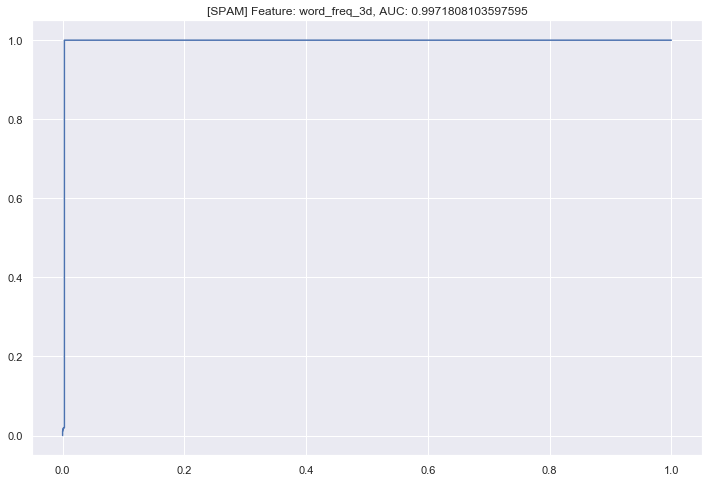

In [80]:
plt.figure(figsize=(12, 8))
feature = 'word_freq_3d'
auc, points_x, points_y = ROC_AUC(y, X[feature].values)
plt.plot(points_x, points_y)
plt.title(f"[SPAM] Feature: {feature}, AUC: {auc}")

Text(0.5, 1.0, '[SPAM] Feature: word_freq_font, AUC: 0.9922898625501807')

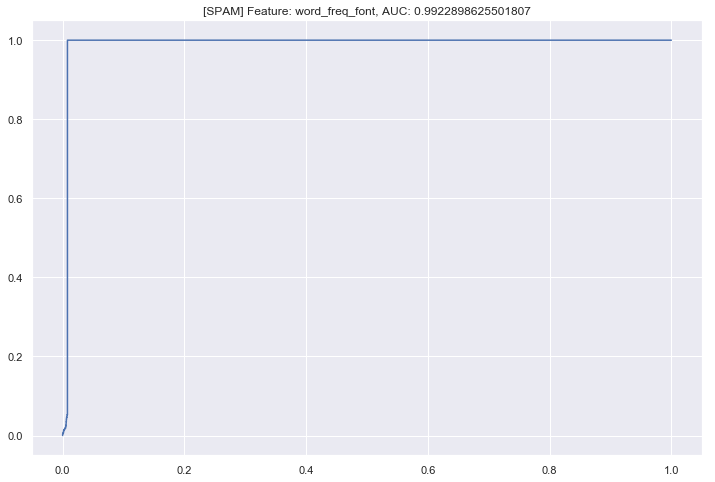

In [81]:
plt.figure(figsize=(12, 8))
feature = 'word_freq_font'
auc, points_x, points_y = ROC_AUC(y, X[feature].values)
plt.plot(points_x, points_y)
plt.title(f"[SPAM] Feature: {feature}, AUC: {auc}")

Text(0.5, 1.0, '[SPAM] Feature: word_freq_remove, AUC: 0.9879969786200758')

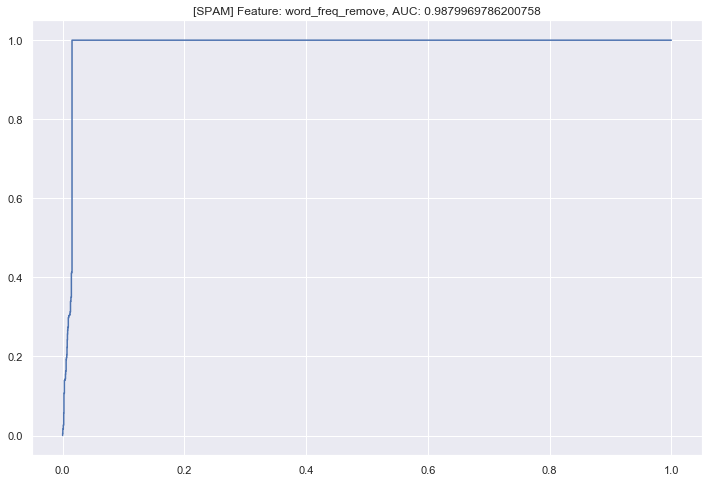

In [82]:
plt.figure(figsize=(12, 8))
feature = 'word_freq_remove'
auc, points_x, points_y = ROC_AUC(y, X[feature].values)
plt.plot(points_x, points_y)
plt.title(f"[SPAM] Feature: {feature}, AUC: {auc}")

Cancer

In [84]:
cancer_df = pd.read_csv('../data/cancer.csv')
cancer_df['int_label'] = cancer_df.label.map({'M':1, 'B':0})
cancer_df['label'] = cancer_df.int_label
cancer_df.drop('int_label', axis=1, inplace=True)
X = cancer_df[cancer_df.columns.difference(['label'])]
y = cancer_df.label.values

In [85]:
column2auc = Counter()
for column in X.columns:
    auc, points_x, points_y = ROC_AUC(y, X[column].values)
    column2auc[column] = auc
for column, auc in column2auc.most_common():
    print(f"feature: {column}, auc: {auc}")

feature: 23, auc: 0.9755562602399477
feature: 21, auc: 0.9705618096295139
feature: 24, auc: 0.9698615295174705
feature: 28, auc: 0.9667829395909339
feature: 8, auc: 0.9644574811056521
feature: 3, auc: 0.9469504783045332
feature: 4, auc: 0.9383621373077581
feature: 7, auc: 0.9378600496802523
feature: 1, auc: 0.9377147085249237
feature: 14, auc: 0.9264705882352992
feature: 27, auc: 0.9214100734633532
feature: 13, auc: 0.8764335923048482
feature: 11, auc: 0.8683737646001827
feature: 6, auc: 0.8638681887849513
feature: 26, auc: 0.8623751387347436
feature: 18, auc: 0.7919771682257851
feature: 22, auc: 0.7848026002854009
feature: 17, auc: 0.7808651762591841
feature: 2, auc: 0.7760689181332937
feature: 25, auc: 0.754598065641354
feature: 29, auc: 0.7371571270017471
feature: 16, auc: 0.7273399926008156
feature: 5, auc: 0.7224776703134109
feature: 9, auc: 0.6990645314729689
feature: 30, auc: 0.686089530151686
feature: 20, auc: 0.6203689022778948
feature: 12, auc: 0.5117726335817364
feature: 10,

Text(0.5, 1.0, '[Cancer] Feature: 23, AUC: 0.9755562602399477')

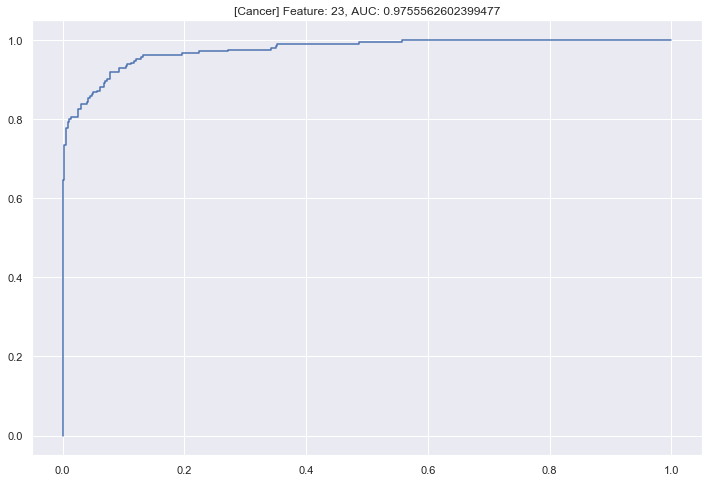

In [86]:
plt.figure(figsize=(12, 8))
feature = '23'
auc, points_x, points_y = ROC_AUC(y, X[feature].values)
plt.plot(points_x, points_y)
plt.title(f"[Cancer] Feature: {feature}, AUC: {auc}")

Text(0.5, 1.0, '[Cancer] Feature: 21, AUC: 0.9705618096295139')

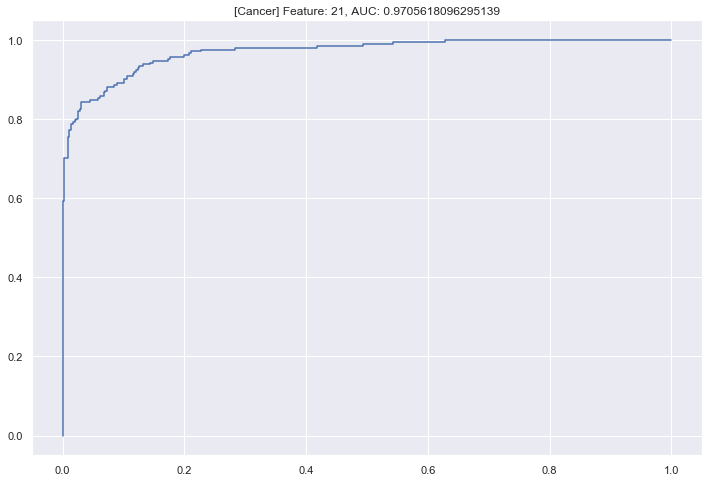

In [87]:
plt.figure(figsize=(12, 8))
feature = '21'
auc, points_x, points_y = ROC_AUC(y, X[feature].values)
plt.plot(points_x, points_y)
plt.title(f"[Cancer] Feature: {feature}, AUC: {auc}")

Text(0.5, 1.0, '[Cancer] Feature: 24, AUC: 0.9698615295174705')

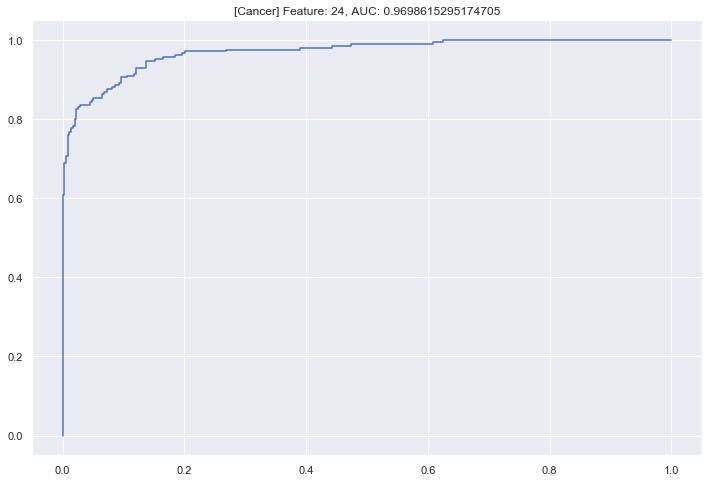

In [88]:
plt.figure(figsize=(12, 8))
feature = '24'
auc, points_x, points_y = ROC_AUC(y, X[feature].values)
plt.plot(points_x, points_y)
plt.title(f"[Cancer] Feature: {feature}, AUC: {auc}")

### Task 2 - Train/validation sets

Spam

In [185]:
spam_df = pd.read_csv('../data/spam.csv')
X = spam_df[spam_df.columns.difference(['label'])]
y = spam_df.label.values
spam_X_train, spam_X_val, spam_y_train, spam_y_val = train_test_split(X, y, test_size=0.2, random_state=1)

print("Check proportions")
print(f"Train 1st class share: {spam_y_train[spam_y_train == 1].shape[0] / spam_y_train.shape[0]}")
print(f"Validation 1st class share: {spam_y_val[spam_y_val == 1].shape[0] / spam_y_val.shape[0]}")

Check proportions
Train 1st class share: 0.39565217391304347
Validation 1st class share: 0.38762214983713356


Cancer

In [189]:
cancer_df = pd.read_csv('../data/cancer.csv')
cancer_df['int_label'] = cancer_df.label.map({'M':1, 'B':0})
cancer_df['label'] = cancer_df.int_label
cancer_df.drop('int_label', axis=1, inplace=True)
X = cancer_df[cancer_df.columns.difference(['label'])]
y = cancer_df.label.values
cancer_X_train, cancer_X_val, cancer_y_train, cancer_y_val = train_test_split(
    X, y, test_size=0.2, random_state=1)

print("Check proportions")
print(f"Train 1st class share: {cancer_y_train[cancer_y_train == 1].shape[0] / cancer_y_train.shape[0]}")
print(f"Validation 1st class share: {cancer_y_val[cancer_y_val == 1].shape[0] / cancer_y_val.shape[0]}")

Check proportions
Train 1st class share: 0.37362637362637363
Validation 1st class share: 0.3684210526315789


### Task 3 - Decision tree

In [212]:
class DecisionTree():
    class Node():
        def __init__(self):
            self.rule = -1
            self.threshold = None
            self.left_node = None
            self.right_node = None
            self.node_class = None
            
    def __init__(self, debug=''):
        self.tree = None
        self.debug = debug
        self.impurity_f = {
            'entropy': self.get_entropy,
            'mscl_error': self.get_mscl_error,
            'gini': self.get_gini
        }
    
    def get_entropy(self, cnt, n):
        entropy = 0
        for _, class_n in cnt.most_common():
            if class_n > 0:
                entropy -= (class_n/n * np.log2(class_n/n))
        return entropy
    
    def get_mscl_error(self, cnt, n):
        return 1 - cnt.most_common()[0][1]/n
    
    def get_gini(self, cnt, n):
        gini = 0
        for _, class_n in cnt.most_common():
            gini += class_n/n * (1 - class_n/n)
        return gini
        
    def get_IG_threshold(self, v, y, n, impurity_f):
        sorted_vy = sorted(list(zip(v, y)))
        best_threshold = None
        best_IG = None
        y_left_cnt = Counter()
        y_right_cnt = Counter([t[1] for t in sorted_vy[0:]])
        n_left = 0
        n_right = len(sorted_vy)
        total_IG = n_right/n * impurity_f(y_right_cnt, n_right) # all values    
        for pos, (v, y) in enumerate(sorted_vy):
            if pos > 0 and (sorted_vy[pos][0] != sorted_vy[pos-1][0]):
                left_IG = n_left/n * impurity_f(y_left_cnt, n_left)
                right_IG = n_right/n * impurity_f(y_right_cnt, n_right)
                IG = total_IG - left_IG - right_IG
                if best_IG is None or IG > best_IG:
                    best_IG = IG
                    best_threshold = v
            y_left_cnt[y] = y_left_cnt[y] + 1
            n_left += 1
            y_right_cnt[y] -= 1
            n_right -= 1
        return best_IG, best_threshold
    
    def build_tree(self, node, X, y, n, level, max_level, impurity):
        cnt_y = Counter(y)
        if len(cnt_y) == 1:
            node.node_class = y[0]
            return
        if level == max_level:
            node.node_class = cnt_y.most_common()[0][0]
            return
        features_num = X.shape[1]
        features2IG = []
        for feature in range(0, features_num):
            IG, threshold = self.get_IG_threshold(X[:, feature], y, n, self.impurity_f[impurity])
            if IG is not None:
                features2IG.append((IG, threshold, feature))
        if len(features2IG) == 0:
            node.node_class = y[0]
            return
        IG, threshold, best_feature = sorted(features2IG, reverse=True)[0] # get always max
        node.IG = IG
        node.rule = best_feature
        node.threshold = threshold
        if 'v' in self.debug:
            print(f"[L{level}] n: {X.shape[0]}, feature: {node.rule}, threshold: {node.threshold}, IG: {IG}")
        
        # Left subtree
        node.left_node = self.Node()
        if 'vvv' in self.debug:
            print(f"[L{level}] Samples to left: {X[X[:, best_feature] < threshold].shape[0]}")
        self.build_tree(node.left_node,
                        X[X[:, best_feature] < threshold],
                        y[X[:, best_feature] < threshold],
                        n, level+1, max_level, impurity)
        # Right subtree
        node.right_node = self.Node()
        if 'vvv' in self.debug:
            print(f"[L{level}] Samples to right: {X[X[:, best_feature] >= threshold].shape[0]}")
        self.build_tree(node.right_node,
                        X[X[:, best_feature] >= threshold],
                        y[X[:, best_feature] >= threshold],
                        n, level+1, max_level, impurity) 
        return
        
    
    def fit(self, X, y, max_level=10, impurity='entropy'):
        self.tree = self.Node()
        self.build_tree(self.tree, X, y, X.shape[0], 0, max_level, impurity)
        
    def predict(self, X):
        predictions = []
        for sample in X:
            current_node = self.tree
            while current_node.node_class is None:
                if sample[current_node.rule] < current_node.threshold:
                    current_node = current_node.left_node
                else:
                    current_node = current_node.right_node
            predictions.append(current_node.node_class)
        return predictions

#### Entropy

In [205]:
impurity = 'entropy'
print(f"Spam dataset, impurity: {impurity}")
print('-' * 10)
best_depth = None
best_accuracy = None
dtree = DecisionTree(debug='')
for max_level in range(1, 11):
    dtree.fit(spam_X_train.values, spam_y_train, max_level=max_level, impurity=impurity)
    predictions = dtree.predict(spam_X_val.values)
    accuracy = accuracy_score(spam_y_val, predictions)
    if best_accuracy is None or accuracy > best_accuracy:
        best_depth = max_level
        best_accuracy = accuracy
    print(f"Depth: {max_level}, accuracy: {accuracy}")
print('-' * 10)
print(f"Best tree depth: {best_depth}, accuracy: {best_accuracy}")

Spam dataset, impurity: entropy
----------
Depth: 1, accuracy: 0.7839305103148752
Depth: 2, accuracy: 0.8230184581976113
Depth: 3, accuracy: 0.8914223669923995
Depth: 4, accuracy: 0.9153094462540716
Depth: 5, accuracy: 0.9229098805646037
Depth: 6, accuracy: 0.9337676438653637
Depth: 7, accuracy: 0.9294245385450597
Depth: 8, accuracy: 0.9196525515743756
Depth: 9, accuracy: 0.9294245385450597
Depth: 10, accuracy: 0.9109663409337676
----------
Best tree depth: 6, accuracy: 0.9337676438653637


In [206]:
impurity = 'entropy'
print(f"Cancer dataset, impurity: {impurity}")
print('-' * 10)
best_depth = None
best_accuracy = None
dtree = DecisionTree(debug='')
for max_level in range(1, 11):
    dtree.fit(cancer_X_train.values, cancer_y_train, max_level=max_level, impurity=impurity)
    predictions = dtree.predict(cancer_X_val.values)
    accuracy = accuracy_score(cancer_y_val, predictions)
    if best_accuracy is None or accuracy > best_accuracy:
        best_depth = max_level
        best_accuracy = accuracy
    print(f"Depth: {max_level}, accuracy: {accuracy}")
print('-' * 10)
print(f"Best tree depth: {best_depth}, accuracy: {best_accuracy}")

Cancer dataset, impurity: entropy
----------
Depth: 1, accuracy: 0.868421052631579
Depth: 2, accuracy: 0.868421052631579
Depth: 3, accuracy: 0.9122807017543859
Depth: 4, accuracy: 0.956140350877193
Depth: 5, accuracy: 0.9122807017543859
Depth: 6, accuracy: 0.9473684210526315
Depth: 7, accuracy: 0.9473684210526315
Depth: 8, accuracy: 0.9473684210526315
Depth: 9, accuracy: 0.9473684210526315
Depth: 10, accuracy: 0.9473684210526315
----------
Best tree depth: 4, accuracy: 0.956140350877193


#### Misclassification error

In [207]:
impurity = 'mscl_error'
print(f"Spam dataset, impurity: {impurity}")
print('-' * 10)
best_depth = None
best_accuracy = None
dtree = DecisionTree(debug='')
for max_level in range(1, 11):
    dtree.fit(spam_X_train.values, spam_y_train, max_level=max_level, impurity=impurity)
    predictions = dtree.predict(spam_X_val.values)
    accuracy = accuracy_score(spam_y_val, predictions)
    if best_accuracy is None or accuracy > best_accuracy:
        best_depth = max_level
        best_accuracy = accuracy
    print(f"Depth: {max_level}, accuracy: {accuracy}")
print('-' * 10)
print(f"Best tree depth: {best_depth}, accuracy: {best_accuracy}")

Spam dataset, impurity: mscl_error
----------
Depth: 1, accuracy: 0.7839305103148752
Depth: 2, accuracy: 0.8816503800217155
Depth: 3, accuracy: 0.8957654723127035
Depth: 4, accuracy: 0.9207383279044516
Depth: 5, accuracy: 0.9250814332247557
Depth: 6, accuracy: 0.9272529858849077
Depth: 7, accuracy: 0.9272529858849077
Depth: 8, accuracy: 0.9272529858849077
Depth: 9, accuracy: 0.9229098805646037
Depth: 10, accuracy: 0.9239956568946797
----------
Best tree depth: 6, accuracy: 0.9272529858849077


In [208]:
impurity = 'mscl_error'
print(f"Cancer dataset, impurity: {impurity}")
print('-' * 10)
best_depth = None
best_accuracy = None
dtree = DecisionTree(debug='')
for max_level in range(1, 11):
    dtree.fit(cancer_X_train.values, cancer_y_train, max_level=max_level, impurity=impurity)
    predictions = dtree.predict(cancer_X_val.values)
    accuracy = accuracy_score(cancer_y_val, predictions)
    if best_accuracy is None or accuracy > best_accuracy:
        best_depth = max_level
        best_accuracy = accuracy
    print(f"Depth: {max_level}, accuracy: {accuracy}")
print('-' * 10)
print(f"Best tree depth: {best_depth}, accuracy: {best_accuracy}")

Cancer dataset, impurity: mscl_error
----------
Depth: 1, accuracy: 0.8771929824561403
Depth: 2, accuracy: 0.8859649122807017
Depth: 3, accuracy: 0.9210526315789473
Depth: 4, accuracy: 0.9035087719298246
Depth: 5, accuracy: 0.9035087719298246
Depth: 6, accuracy: 0.9122807017543859
Depth: 7, accuracy: 0.8947368421052632
Depth: 8, accuracy: 0.8947368421052632
Depth: 9, accuracy: 0.8947368421052632
Depth: 10, accuracy: 0.8947368421052632
----------
Best tree depth: 3, accuracy: 0.9210526315789473


#### Gini

In [215]:
impurity = 'gini'
print(f"Spam dataset, impurity: {impurity}")
print('-' * 10)
best_depth = None
best_accuracy = None
dtree = DecisionTree(debug='')
for max_level in range(1, 11):
    dtree.fit(spam_X_train.values, spam_y_train, max_level=max_level, impurity=impurity)
    predictions = dtree.predict(spam_X_val.values)
    accuracy = accuracy_score(spam_y_val, predictions)
    if best_accuracy is None or accuracy > best_accuracy:
        best_depth = max_level
        best_accuracy = accuracy
    print(f"Depth: {max_level}, accuracy: {accuracy}")
print('-' * 10)
print(f"Best tree depth: {best_depth}, accuracy: {best_accuracy}")

Spam dataset, impurity: gini
----------
Depth: 1, accuracy: 0.7839305103148752
Depth: 2, accuracy: 0.8783930510314875
Depth: 3, accuracy: 0.8870792616720955
Depth: 4, accuracy: 0.9077090119435396
Depth: 5, accuracy: 0.9044516829533116
Depth: 6, accuracy: 0.9196525515743756
Depth: 7, accuracy: 0.9087947882736156
Depth: 8, accuracy: 0.9229098805646037
Depth: 9, accuracy: 0.9174809989142236
Depth: 10, accuracy: 0.9218241042345277
----------
Best tree depth: 8, accuracy: 0.9229098805646037


In [216]:
impurity = 'gini'
print(f"Cancer dataset, impurity: {impurity}")
print('-' * 10)
best_depth = None
best_accuracy = None
dtree = DecisionTree(debug='')
for max_level in range(1, 11):
    dtree.fit(cancer_X_train.values, cancer_y_train, max_level=max_level, impurity=impurity)
    predictions = dtree.predict(cancer_X_val.values)
    accuracy = accuracy_score(cancer_y_val, predictions)
    if best_accuracy is None or accuracy > best_accuracy:
        best_depth = max_level
        best_accuracy = accuracy
    print(f"Depth: {max_level}, accuracy: {accuracy}")
print('-' * 10)
print(f"Best tree depth: {best_depth}, accuracy: {best_accuracy}")

Cancer dataset, impurity: gini
----------
Depth: 1, accuracy: 0.8771929824561403
Depth: 2, accuracy: 0.8859649122807017
Depth: 3, accuracy: 0.9210526315789473
Depth: 4, accuracy: 0.9298245614035088
Depth: 5, accuracy: 0.9298245614035088
Depth: 6, accuracy: 0.9298245614035088
Depth: 7, accuracy: 0.9298245614035088
Depth: 8, accuracy: 0.9298245614035088
Depth: 9, accuracy: 0.9298245614035088
Depth: 10, accuracy: 0.9298245614035088
----------
Best tree depth: 4, accuracy: 0.9298245614035088


#### Results

<table>
    <tr><td></td><td>Best depth</td><td>Accuracy</td></tr>
    <tr><td>Spam, Entropy</td><td>6</td><td>0.9337</td></tr>
    <tr><td>Spam, Misclassification error</td><td>6</td><td>0.9272</td></tr>
    <tr><td>Spam, Gini</td><td>8</td><td>0.9229</td></tr>
    <tr><td>Cancer, Entropy</td><td>4</td><td>0.9561</td></tr>
    <tr><td>Cancer, Misclassification error</td><td>3</td><td>0.9210</td></tr>
    <tr><td>Cancer, Gini</td><td>4</td><td>0.9298</td></tr>
</table>